In [1]:
import pandas as pd 
import numpy as np

%run FeatureSelection.ipynb

EmplType              float64
Certification           int64
InjuryMech            float64
High_impact_InjSev    float64
Amnesia_verb          float64
                       ...   
HospHead              float64
HospHeadPosCT           int64
Intub24Head           float64
Neurosurgery          float64
PosIntFinal           float64
Length: 124, dtype: object
EmplType              Int64
Certification         Int64
InjuryMech            Int64
High_impact_InjSev    Int64
Amnesia_verb          Int64
                      ...  
HospHead              Int64
HospHeadPosCT         Int64
Intub24Head           Int64
Neurosurgery          Int64
PosIntFinal           Int64
Length: 124, dtype: object
  Removing 47193 NaN values from 26 columns


<Figure size 640x480 with 1 Axes>

Counter({0: 42636, 1: 763})


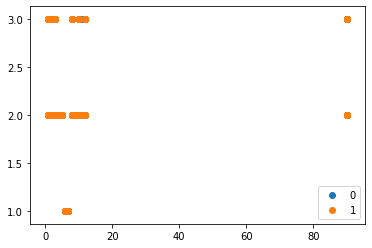

In [12]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

X = pecarn_df[selected_features.Feature].astype('int64').to_numpy()  #independent columns from feature selection
y = pecarn_df['PosIntFinal'].astype('int64').to_numpy()    #target column

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [4]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

X = pecarn_df[selected_features.Feature].astype('int64').to_numpy()  #independent columns from feature selection
y = pecarn_df['PosIntFinal'].astype('int64').to_numpy()    #target column

# define model
model = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.89284


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into train and test sets
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model.fit(X_train, y_train)
print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=99, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Accuracy: 97.05%
